# Weight of evidence binning and Information Value
The logistic regression model is one of the most commonly used statistical techniques for  binary classification problems with both the weight of evidence (WoE) and information value (IV) evolved from the same technique.

- WoE describes the relationship between the feature variables and th binary classification target.
- IV measures the strength of that relationship.

WoE separates events from non-events by calculating the ratio of the two classification outcomes (performing and non-performing loans) and taking the natural logarithm of that ratio. For a continuous variables, the observations are assigned to categories and then combine the categories with similar WOE values.  By using the proper binning technique, WoE creates a monotonic relationship (either increase or decrease) between the independent and dependent variable.  WoE accounts for both missing values and outliers.

IV relates the sum of the values for WoE over all groups and captures the amount of information of any predictor variable in distinguishing between the two categories and by ranking the variables on the basis of their importance.

In [231]:
#read in packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [232]:
#set graphics
plt.rc("font", size=12)
plt.rcParams["figure.figsize"] = (5, 5)
plt.style.use('fivethirtyeight')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [233]:
#defines the function
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF = pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], 
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])

        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF

Reads in the data.

In [234]:
data_in = pd.read_csv('data/after_dt.csv')
data_store = data_in[{'PERFORMING', 'loan_amnt', 'Maturity', 'vintage', 'int_rate', 'CREDIT_HISTORY',
                      'acc_open_past_24mths', 'collections_12_mths_ex_med', 'inq_last_6mths', 'annual_inc',
                      'avg_cur_bal', 'dti', 'mo_sin_rcnt_tl', 'num_bc_tl', 'total_acc', 'emp_length_int',
                      'open_acc', 'mort_acc', 'num_bc_sats', 'num_rev_accts', 'bc_open_to_buy',
                      'mths_since_recent_bc', 'tot_cur_bal', 'num_il_tl', 'debt_consolidation',
                      'num_accts_ever_120_pd', 'mo_sin_old_rev_tl_op', 'revol_util', 'revol_bal',
                      'delinq_2yrs', 'num_actv_bc_tl', 'mo_sin_rcnt_rev_tl_op', 'pub_rec', 'num_actv_rev_tl',
                      'total_rev_hi_lim', 'num_op_rev_tl', 'acc_now_delinq', 'bc_util',
                      'chargeoff_within_12_mths', 'delinq_amnt', 'ANY', 'RENT', 'MORTGAGE', 'NONE', 'OTHER',
                      'OWN', 'renewable_energy', 'vacation', 'small_business', 'medical', 'other', 'car',
                      'credit_card', 'educational', 'home_improvement', 'house', 'major_purchase', 'moving',
                      'wedding'}]

## Running the WoE and IV

In [235]:
IV_Table = iv_woe(data=data_store, target="PERFORMING", bins=10, show_woe=False);

Information value of OWN is 7.7e-05
Information value of delinq_2yrs is 0.005129
Information value of dti is 0.041661
Information value of num_op_rev_tl is 0.006251
Information value of other is 0.0
Information value of debt_consolidation is 0.012737
Information value of bc_util is 0.043119
Information value of bc_open_to_buy is 0.096366
Information value of mo_sin_rcnt_tl is 0.045916
Information value of moving is 0.0001
Information value of wedding is 0.0
Information value of home_improvement is 0.001229
Information value of tot_cur_bal is 0.037559
Information value of Maturity is 0.068116
Information value of loan_amnt is 0.018558
Information value of OTHER is inf
Information value of mths_since_recent_bc is 0.031175
Information value of open_acc is 0.00491
Information value of renewable_energy is 0.000105
Information value of emp_length_int is 0.003001
Information value of revol_util is 0.033918
Information value of educational is 0.0
Information value of mort_acc is 0.016121
Infor

In [236]:
pd.options.display.float_format = '{:.4f}'.format
IV_Table.sort_values(by='IV',ascending=False)

,Variable,IV
0,collections_12_mths_ex_med,inf
0,chargeoff_within_12_mths,inf
0,acc_now_delinq,inf
0,OTHER,inf
0,int_rate,0.4371
0,vintage,0.3819
0,bc_open_to_buy,0.0964
0,acc_open_past_24mths,0.0900
0,Maturity,0.0681
0,inq_last_6mths,0.0595


## Analyzing the results

Of the variables `collections_12_mths_ex_med`, `chargeoff_within_12_mths`, `acc_now_delinq`, and `OTHER` can be dropped and the model rerun.  Additionally, `int_rate`, `vintage`, and `Maturity` can also be shelved.

In [237]:
data_store2 = data_in[{'PERFORMING', 'loan_amnt', 'CREDIT_HISTORY',
                      'acc_open_past_24mths', 'inq_last_6mths', 'annual_inc',
                      'avg_cur_bal', 'dti', 'mo_sin_rcnt_tl', 'num_bc_tl', 'total_acc', 'emp_length_int',
                      'open_acc', 'mort_acc', 'num_bc_sats', 'num_rev_accts', 'bc_open_to_buy',
                      'mths_since_recent_bc', 'tot_cur_bal', 'num_il_tl', 'debt_consolidation',
                      'num_accts_ever_120_pd', 'mo_sin_old_rev_tl_op', 'revol_util', 'revol_bal',
                      'delinq_2yrs', 'num_actv_bc_tl', 'mo_sin_rcnt_rev_tl_op', 'pub_rec', 'num_actv_rev_tl',
                      'total_rev_hi_lim', 'num_op_rev_tl', 'bc_util',
                      'delinq_amnt', 'ANY', 'RENT', 'MORTGAGE', 'NONE', 
                      'OWN', 'renewable_energy', 'vacation', 'small_business', 'medical', 'other', 'car',
                      'credit_card', 'educational', 'home_improvement', 'house', 'major_purchase', 'moving',
                      'wedding'}]
IV_Table2 = iv_woe(data=data_store2, target="PERFORMING", bins=10, show_woe=False);
pd.options.display.float_format = '{:.4f}'.format
IV_Table2.sort_values(by='IV',ascending=False)

Information value of OWN is 7.7e-05
Information value of delinq_2yrs is 0.005129
Information value of dti is 0.041661
Information value of num_op_rev_tl is 0.006251
Information value of other is 0.0
Information value of debt_consolidation is 0.012737
Information value of bc_util is 0.043119
Information value of bc_open_to_buy is 0.096366
Information value of mo_sin_rcnt_tl is 0.045916
Information value of moving is 0.0001
Information value of wedding is 0.0
Information value of home_improvement is 0.001229
Information value of tot_cur_bal is 0.037559
Information value of loan_amnt is 0.018558
Information value of mths_since_recent_bc is 0.031175
Information value of open_acc is 0.00491
Information value of renewable_energy is 0.000105
Information value of emp_length_int is 0.003001
Information value of revol_util is 0.033918
Information value of educational is 0.0
Information value of mort_acc is 0.016121
Information value of delinq_amnt is 0.0
Information value of vacation is 0.000105

,Variable,IV
0,bc_open_to_buy,0.0964
0,acc_open_past_24mths,0.0900
0,inq_last_6mths,0.0595
0,total_rev_hi_lim,0.0568
0,mo_sin_rcnt_tl,0.0459
0,bc_util,0.0431
0,avg_cur_bal,0.0430
0,dti,0.0417
0,mo_sin_rcnt_rev_tl_op,0.0410
0,tot_cur_bal,0.0376


Rerunning the analysis without purpose or housing variables.

In [238]:
data_store3 = data_in[{'PERFORMING', 'loan_amnt', 'CREDIT_HISTORY',
                      'acc_open_past_24mths', 'inq_last_6mths', 'annual_inc',
                      'avg_cur_bal', 'dti', 'mo_sin_rcnt_tl', 'num_bc_tl', 'total_acc', 'emp_length_int',
                      'open_acc', 'mort_acc', 'num_bc_sats', 'num_rev_accts', 'bc_open_to_buy',
                      'mths_since_recent_bc', 'tot_cur_bal', 'num_il_tl',
                      'num_accts_ever_120_pd', 'mo_sin_old_rev_tl_op', 'revol_util', 'revol_bal',
                      'delinq_2yrs', 'num_actv_bc_tl', 'mo_sin_rcnt_rev_tl_op', 'pub_rec', 'num_actv_rev_tl',
                      'total_rev_hi_lim', 'num_op_rev_tl', 'bc_util',
                      'delinq_amnt'}]
IV_Table3 = iv_woe(data=data_store3, target="PERFORMING", bins=10, show_woe=False);
pd.options.display.float_format = '{:.4f}'.format
IV_Table3.sort_values(by='IV',ascending=False)

Information value of delinq_2yrs is 0.005129
Information value of dti is 0.041661
Information value of num_op_rev_tl is 0.006251
Information value of bc_util is 0.043119
Information value of bc_open_to_buy is 0.096366
Information value of mo_sin_rcnt_tl is 0.045916
Information value of tot_cur_bal is 0.037559
Information value of loan_amnt is 0.018558
Information value of mths_since_recent_bc is 0.031175
Information value of open_acc is 0.00491
Information value of emp_length_int is 0.003001
Information value of revol_util is 0.033918
Information value of mort_acc is 0.016121
Information value of delinq_amnt is 0.0
Information value of annual_inc is 0.030741
Information value of total_rev_hi_lim is 0.056816
Information value of num_bc_sats is 0.000424
Information value of num_accts_ever_120_pd is 0.001817
Information value of inq_last_6mths is 0.059454
Information value of pub_rec is 0.005819
Information value of num_rev_accts is 0.003112
Information value of mo_sin_rcnt_rev_tl_op is 0

,Variable,IV
0,bc_open_to_buy,0.0964
0,acc_open_past_24mths,0.0900
0,inq_last_6mths,0.0595
0,total_rev_hi_lim,0.0568
0,mo_sin_rcnt_tl,0.0459
0,bc_util,0.0431
0,avg_cur_bal,0.0430
0,dti,0.0417
0,mo_sin_rcnt_rev_tl_op,0.0410
0,tot_cur_bal,0.0376


The results suggest that 
- `bc_open_to_buy`
- `acc_open_past_24mths	`
- `inq_last_6mths`
- `total_rev_hi_lim`
- `mo_sin_rcnt_tl`
- `bc_util`
- `avg_cur_bal`
- `dti`
- `mo_sin_rcnt_rev_tl_op`
- `tot_cur_bal`
- `revol_util`
- `mths_since_recent_bc`
- `annual_inc`
- `num_actv_rev_tl`
- `loan_amnt`
- `mo_sin_old_rev_tl_op`
- `mort_acc`
- `revol_bal`
- `CREDIT_HISTORY`
should be included further

In [239]:
data_store4 = data_in[{'PERFORMING', 'bc_open_to_buy', 'acc_open_past_24mths', 
                       'inq_last_6mths', 'total_rev_hi_lim', 'mo_sin_rcnt_tl', 'bc_util',
                       'avg_cur_bal', 'dti', 'mo_sin_rcnt_rev_tl_op', 'tot_cur_bal', 'revol_util', 
                       'mths_since_recent_bc', 'annual_inc', 'num_actv_rev_tl', 'loan_amnt',
                       'mo_sin_old_rev_tl_op', 'mort_acc', 'revol_bal', 'CREDIT_HISTORY'}]
IV_Table4 = iv_woe(data=data_store3, target="PERFORMING",
                   bins=10, show_woe=False)
pd.options.display.float_format = '{:.4f}'.format
IV_Table4.sort_values(by='IV', ascending=False)

Information value of delinq_2yrs is 0.005129
Information value of dti is 0.041661
Information value of num_op_rev_tl is 0.006251
Information value of bc_util is 0.043119
Information value of bc_open_to_buy is 0.096366
Information value of mo_sin_rcnt_tl is 0.045916
Information value of tot_cur_bal is 0.037559
Information value of loan_amnt is 0.018558
Information value of mths_since_recent_bc is 0.031175
Information value of open_acc is 0.00491
Information value of emp_length_int is 0.003001
Information value of revol_util is 0.033918
Information value of mort_acc is 0.016121
Information value of delinq_amnt is 0.0
Information value of annual_inc is 0.030741
Information value of total_rev_hi_lim is 0.056816
Information value of num_bc_sats is 0.000424
Information value of num_accts_ever_120_pd is 0.001817
Information value of inq_last_6mths is 0.059454
Information value of pub_rec is 0.005819
Information value of num_rev_accts is 0.003112
Information value of mo_sin_rcnt_rev_tl_op is 0

,Variable,IV
0,bc_open_to_buy,0.0964
0,acc_open_past_24mths,0.0900
0,inq_last_6mths,0.0595
0,total_rev_hi_lim,0.0568
0,mo_sin_rcnt_tl,0.0459
0,bc_util,0.0431
0,avg_cur_bal,0.0430
0,dti,0.0417
0,mo_sin_rcnt_rev_tl_op,0.0410
0,tot_cur_bal,0.0376


## Visualizing the variables
The ranking of IV based on the WoE is the following.

Text(0, 0.5, 'Feature name')

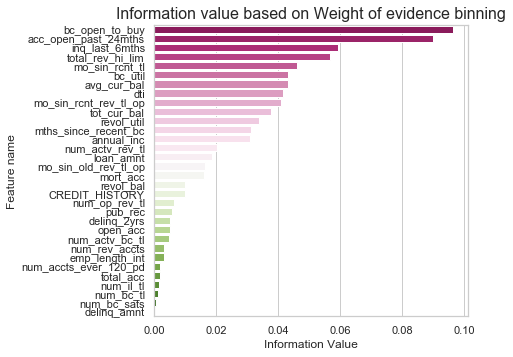

In [240]:
IV_Table4.sort_values(by=["IV"], ascending=False, inplace=True)
IV_Table4.head(10)

IV_Table4_graph=sns.barplot(x="IV", y='Variable', data = IV_Table4, palette="PiYG")

IV_Table4_graph.set_title("Information value based on Weight of evidence binning", fontsize=16)
IV_Table4_graph.set_xlabel("Information Value", fontsize=12)
IV_Table4_graph.set_ylabel("Feature name", fontsize=12)


# Conclusion
The data is saved and extracted.  Adding the categorical values for purpose and housing

In [244]:
data_out = data_in[{'PERFORMING', 'bc_open_to_buy', 'acc_open_past_24mths',
                    'inq_last_6mths', 'total_rev_hi_lim', 'mo_sin_rcnt_tl', 'bc_util',
                    'avg_cur_bal', 'dti', 'mo_sin_rcnt_rev_tl_op', 'tot_cur_bal', 'revol_util',
                    'mths_since_recent_bc', 'annual_inc', 'num_actv_rev_tl', 'loan_amnt',
                    'mo_sin_old_rev_tl_op', 'mort_acc', 'revol_bal', 'CREDIT_HISTORY',
                    'ANY', 'RENT', 'MORTGAGE', 'NONE',
                    'OWN', 'renewable_energy', 'vacation', 'small_business', 'medical', 'other', 'car',
                    'credit_card', 'educational', 'home_improvement', 'house', 'major_purchase', 'moving',
                    'wedding'}]


In [242]:
# save step 
data_out.to_csv('data/after_woe.csv')

In [243]:
# ENDS # ENDS # ENDS
#########################################################################################
# ENDS ####### (c) Peter Went, 2019
#########################################################################################